## A

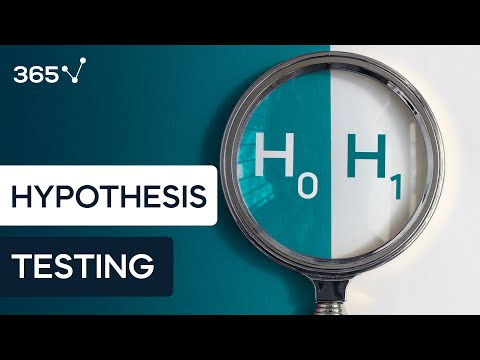

In [3]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

## B

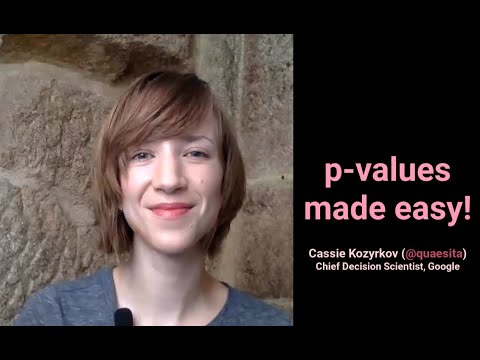

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

## 1

For an idea to be examined and tested statistically, it should be possible to collect reliable and quantifiable data about something (e.g. the number of people without the vaccine that got sick vs the number of people with the vaccine, or the number of people that are in favor of something). A null hypothesis should be the answer to a question that is opposite to the thing you want to prove (e.g. if you want to show that exercising has an effect on the risk of sickness, the null hypothesis would be exercising has no effect on the risk of sickness). In terms of hypothesis testing, the alternative hypothesis is the opposite of the null hypothesis (e.g. if the null hypothesis is that eating a fruit a day has no impact on your health, the alternative hypothesis would be that eating a fruit a day has an impact on your health, which could be positive or negative).

## 2

A sample consists of many individual data points, which can be represented as $x_i$. When we conduct tests, we can take a sample from a population and use techniques such as bootstrapping to create a distribution of bootstrapped means for further analysis. These tests can tell us the range of values that $\mu$, which is the population mean, can be in, and where $\mu$ is likely to be. The purpose of a test is to determine something about a population based on a sample, so the outcomes of the tests refer to population parameters, not sample parameters. When conducting tests, we check if $\mu_0$, the value of the population mean if the null hypothesis is true, is within the range that we are confident $\mu$ is in. If it is, we say the null hypothesis is true, and if it is not then it is false. The sample mean, or $\bar{x}$, refers to the mean of the orignal sample, and is not what we are trying to test for in a test.

## 3

When we conduct tests we are often trying to prove or show something, which means that before showing/proving the thing is true it has to be false to begin with. Hence, the null hypothesis should be assumed to be true to begin with. To see if it is actually true or not, we can then compare the null hypothesis to the sampling distribution, and if it on the extremes of the distribution, so it is very unlikely (which means that the p value is small) then we can say that the null hypothesis is false.

## 4

The p value refers to the probability that we obtain a test result at least as extreme as the one we got assuming that the null hypothesis is true. If the p value is small, that means that the probability of getting our result (or a similarly extreme result) is small if the null hypothesis is true, so the null hypothesis is very probably false (and is ridiculous!)

## 5

The null hypothesis for this experiment would be that 50% of couples tilt their head to the right when they kiss

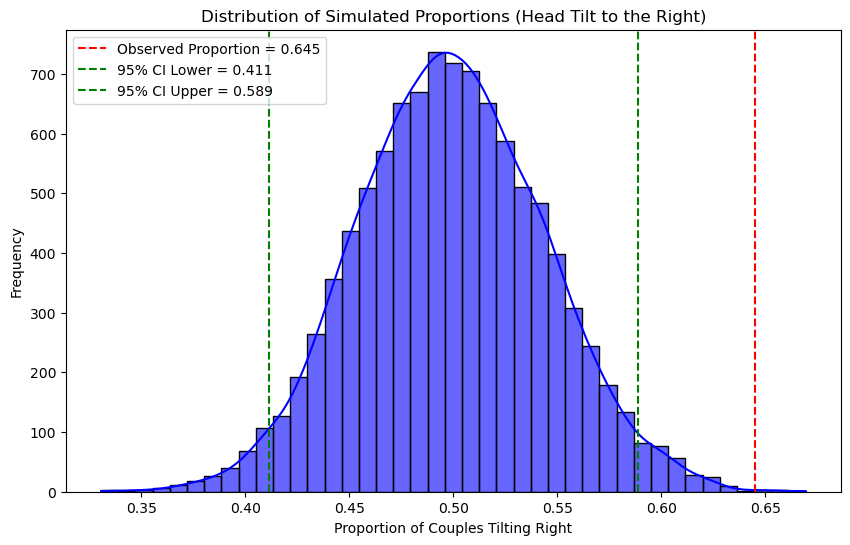

P-value: 0.0008
95% Confidence Interval: [0.41129032 0.58870968]


In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
n_couples = 124  # now using 124 couples for each simulation
observed_proportion = 0.645  # 64.5% observed tilting to the right
n_simulations = 10000  # number of repetitions
null_probability = 0.5  # null hypothesis probability for tilting right

# Perform simulations
np.random.seed(0)  # for reproducibility
simulated_proportions = np.random.binomial(n=n_couples, p=null_probability, size=n_simulations) / n_couples

# Calculate the p-value
p_value = np.mean(simulated_proportions >= observed_proportion)

# Calculate the 95% confidence interval
conf_interval = np.percentile(simulated_proportions, [2.5, 97.5])

# Plotting the distribution of simulated proportions with KDE
plt.figure(figsize=(10, 6))
sns.histplot(simulated_proportions, bins=41, kde=True, color='blue', alpha=0.6)
plt.axvline(observed_proportion, color='red', linestyle='--', label=f'Observed Proportion = {observed_proportion}')
plt.axvline(conf_interval[0], color='green', linestyle='--', label=f'95% CI Lower = {conf_interval[0]:.3f}')
plt.axvline(conf_interval[1], color='green', linestyle='--', label=f'95% CI Upper = {conf_interval[1]:.3f}')
plt.title('Distribution of Simulated Proportions (Head Tilt to the Right)')
plt.xlabel('Proportion of Couples Tilting Right')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Print the p-value and confidence interval
print(f'P-value: {p_value}')
print(f'95% Confidence Interval: {conf_interval}')


https://chatgpt.com/share/67019da3-6aa4-8013-83b4-67c72743b185

If we assume that the null hypothesis is true, an probability of getting an observation as extreme as 64.5% of couples turning their heads right would be very low, which can be seen from the fact that it is outside the 95% confidence interval, and the P-value is 0.0008. Hence there is very strong evidence against the null hypothesis so we can disprove the null hypothesis.

## 6

It is impossible to prove that the null hypothesis is false with a smaller p-value. A small p-value simply means that we can only say with p certainty that the null hypothesis is true. Hence, p must be 0 to prove that the null hypothesis is false (or 1 to be confident that it is true). 

## 7

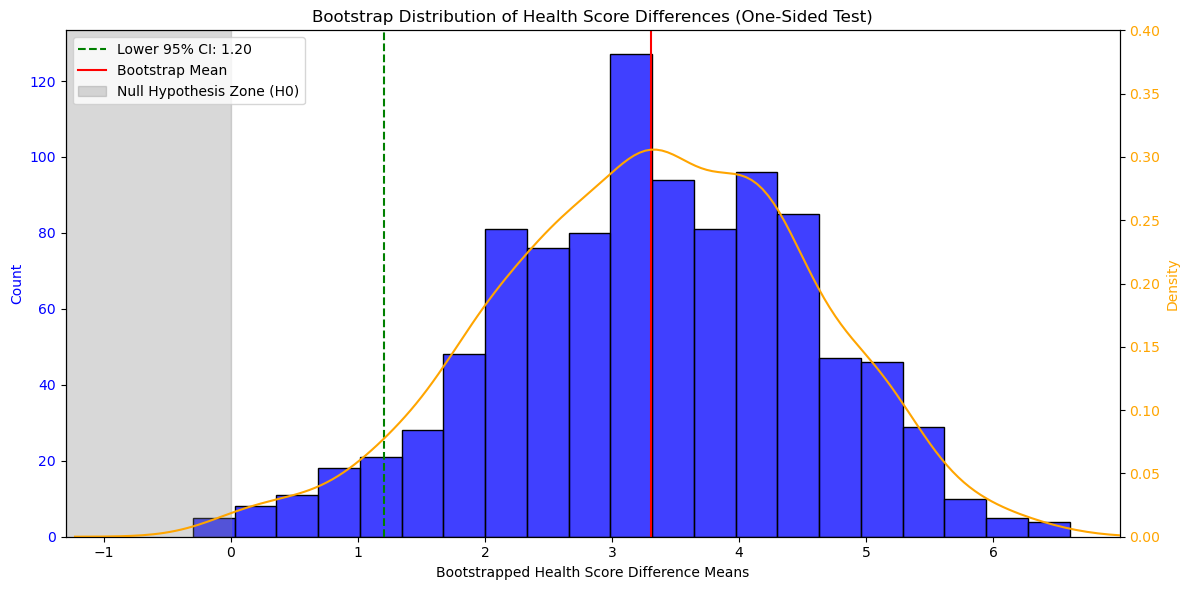

One-sided 95% Lower Confidence Interval: 1.20
P-value: 0.0050
The vaccine has a significant positive effect on health scores (Reject H0).
The result is statistically significant with a p-value of 0.0050 (Reject H0).


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from HW04.csv
df = pd.read_csv('HW04.csv')

# Step 1: Calculate the difference in health scores
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 2: Bootstrapping to calculate the one-sided 95% confidence interval
np.random.seed(42)
bootstrap_means = []

n_bootstraps = 1000
for _ in range(n_bootstraps):
    bootstrap_sample = df['HealthScoreDiff'].sample(frac=1, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

# Convert the list of bootstrap means to a numpy array for easier calculations
bootstrap_means = np.array(bootstrap_means)

# Calculate the one-sided 95% confidence interval (5th percentile for the lower bound)
lower_ci = np.percentile(bootstrap_means, 5)

# Step 3: Plotting both count and density
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot histogram for count
sns.histplot(bootstrap_means, kde=False, color='blue', ax=ax1)
ax1.set_xlabel('Bootstrapped Health Score Difference Means')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add vertical line for the lower confidence interval and mean
ax1.axvline(lower_ci, color='green', linestyle='--', label=f'Lower 95% CI: {lower_ci:.2f}')
ax1.axvline(np.mean(bootstrap_means), color='red', linestyle='-', label='Bootstrap Mean')

# Add the shaded region representing the null hypothesis (from the left up to zero)
ax1.axvspan(min(bootstrap_means) - 1, 0, color='gray', alpha=0.3, label='Null Hypothesis Zone (H0)')

ax1.set_xlim(left=min(bootstrap_means) - 1)

# Create a second y-axis for the density
ax2 = ax1.twinx()
sns.kdeplot(bootstrap_means, color='orange', ax=ax2)
ax2.set_ylabel('Density', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set y-limit for the density axis
ax2.set_ylim(0, 0.4)

# Title and legend
plt.title('Bootstrap Distribution of Health Score Differences (One-Sided Test)')
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Step 4: Calculate the p-value
# P-value is the proportion of bootstrap means less than or equal to 0
p_value = np.mean(bootstrap_means <= 0)

# Display the confidence interval and p-value
print(f"One-sided 95% Lower Confidence Interval: {lower_ci:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on the one-sided confidence interval and p-value
if lower_ci > 0:
    print("The vaccine has a significant positive effect on health scores (Reject H0).")
else:
    print("There is not enough evidence to conclude that the vaccine has a positive effect (Fail to reject H0).")

if p_value < 0.05:
    print(f"The result is statistically significant with a p-value of {p_value:.4f} (Reject H0).")
else:
    print(f"The result is not statistically significant with a p-value of {p_value:.4f} (Fail to reject H0).")


https://chatgpt.com/share/6704537e-661c-8013-bde5-84d6ebefd5f6

The main thing that changed is that the null hypothesis is no longer that the health score difference $=0$, but that it is $\leq0$. Hence, it is now represented by a gray zone. If any part of the gray zone is within the 95% confidence interval, we cannot confidently say the null hypothesis is false, so it is true

Besides that, another thing that changed about the test was that the 95% confidence interval was changed to contain the top 95% of data, instead of the middle 95% (so from the 2.5th percentile mark to the 97.5th percentile mark). This change reflects the fact that the test is now one-sided, and is checking if the health score difference is $>0$ or $\leq0$, so it would not make sense for the top 2.5% to be included as a region where the null hypothesis should not be rejected.

The p value of this test is lower than the last one. This is because the lower bound for the 95% confidence interval has been shifted up to the 5th percentile mark instead of the 2.5th percentile mark. Therefore, the confidence level of the confidence interval would have to be increased to 97.5th percentile to move the lower bound back to the 2.5th percentile mark. Hence, assuming both tests use a 95% confidence interval, the p value for a one sided test should be lower than that of a two sided test.

## 8

In [32]:
import pandas as pd
import numpy as np

# Set the total number of students
num_students = 80

# Create a list with 49 True (correct) and 31 False (incorrect) values
correct_values = [True] * 49 + [False] * 31

# Shuffle the list to randomize the order
np.random.shuffle(correct_values)

# Create the DataFrame
df = pd.DataFrame({
    'correct': correct_values
})

# Show the first few rows of the DataFrame
print(df.head())

# Show the number students guessed correctly (49 students)
print(df.sum())

   correct
0    False
1     True
2     True
3     True
4    False
correct    49
dtype: int64


To begin with, we can organize the sample data into something Python can interpret. We can create a dataframe with each row representing a student, with a column called `correct`. `correct` should show if a student guessed correctly or not.

The null hypothesis `H_0` is that the percentage of the student population that guessed correctly is 50%. This is because if a student guesses randomly, they have a 50% chance of getting it right, so 50% of students be correct. The population mean given that the null hypothesis is true ($\mu_0$) should be 0.5.

The alternative hypothesis `H_a` is that the percentage of the student population that guessed correctly is not 50%, ie it could be higher or lower than 50%.

To see if the null hypothesis is true, we can use bootstrapping on our sample dataset to sample our sample dataset many times (with replacement) and calculate the mean number of students that guessed correctly. We can then use that mean from each bootstrapped dataset to create a bootstrapped sampling distribution. We can then create a 95% confidence interval (from the 2.5th percentile mark to the 97.5th percentile mark as the test is two sided) and determine if $\mu_0$ is within the interval. If it is, we cannot confidently say that it is false, so it is true. Otherwise, it is false.

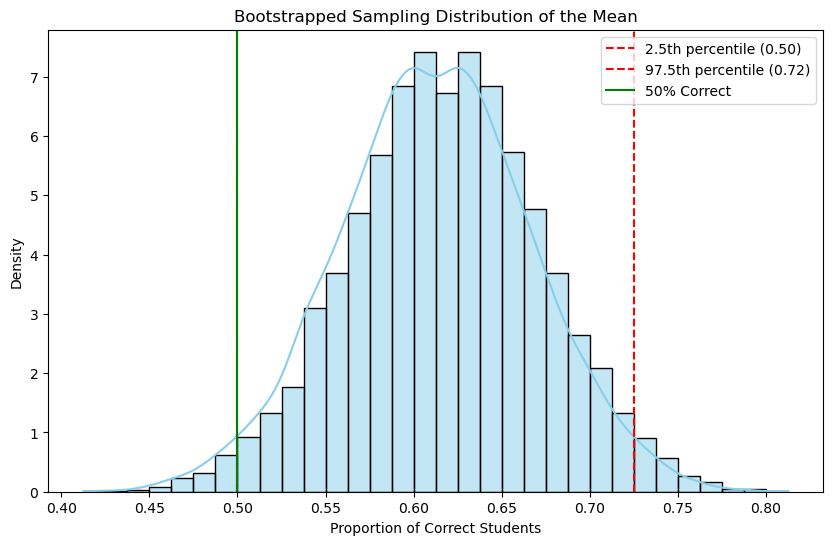

95% Confidence Interval: 0.500000, 0.725000


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert boolean values to integers for mean calculations (True = 1, False = 0)
df['correct_int'] = df['correct'].astype(int)

# Set numpy seed
np.random.seed(0)

# Function to perform bootstrapping and calculate the mean of each bootstrapped sample
def bootstrap_means(data, n_bootstrap_samples=1000):
    means = []
    for _ in range(n_bootstrap_samples):
        # Create a bootstrapped sample with replacement
        boot_sample = data.sample(n=len(data), replace=True)
        # Calculate the mean of 'correct_int' for the sample
        mean_value = boot_sample['correct_int'].mean()
        means.append(mean_value)
    return np.array(means)

# Perform bootstrapping to get the distribution of means
n_bootstrap_samples = 10000
bootstrapped_means = bootstrap_means(df, n_bootstrap_samples)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

# Plot the bootstrapped sampling distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrapped_means, bins=32, kde=True, color='skyblue', stat='density')
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label=f'2.5th percentile ({confidence_interval[0]:.2f})')
plt.axvline(x=confidence_interval[1], color='red', linestyle='--', label=f'97.5th percentile ({confidence_interval[1]:.2f})')

# Mark the 50% correct point on the distribution
plt.axvline(x=0.50, color='green', linestyle='-', label='50% Correct')

# Add titles and labels
plt.title('Bootstrapped Sampling Distribution of the Mean')
plt.xlabel('Proportion of Correct Students')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

# Print the 95% confidence interval
print(f"95% Confidence Interval: {confidence_interval[0]:.6f}, {confidence_interval[1]:.6f}")


Since the 95% confidence interval is between 0.500000 and 0.725000, $\mu_0$ is less than or equal to the lower bound of the interval, so we cannot be confident that the null hypothesis is true. Hence, the null hypothesis is false and the alternative hypothesis is true.

https://chatgpt.com/share/67046576-1620-8013-9862-44e07c7a952d

## 9

Somewhat